In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("C:\\Users\\admin\Desktop\\ML\\Decision Tree.csv")
dataset

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [ ]:
X=dataset.iloc[:,1:-1]
X

,Age,Income,Gender,Marital Status
0,<21,High,Male,Single
1,<21,High,Male,Married
2,21-35,High,Male,Single
3,>35,Medium,Male,Single
4,>35,Low,Female,Single
5,>35,Low,Female,Married
6,21-35,Low,Female,Married
7,<21,Medium,Male,Single
8,<21,Low,Female,Married
9,>35,Medium,Female,Single


In [ ]:
y=dataset.iloc[:,5].values
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(criterion='entropy')
regressor.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#Testing
# Predicting the values of test data
y_pred = regressor.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
regressor.score(X_test,y_test)

1.0

In [ ]:
X_in=np.array([1,1,0,0])
y_pred=regressor.predict([X_in])
y_pred

array(['Yes'], dtype=object)

In [ ]:
from sklearn import tree
textrep = tree.export_text(regressor)
print(textrep)

|--- feature_0 <= 0.50
|   |--- class: Yes
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: No
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: Yes
|   |--- feature_2 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: No
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: Yes



In [ ]:
import matplotlib.pyplot as plt

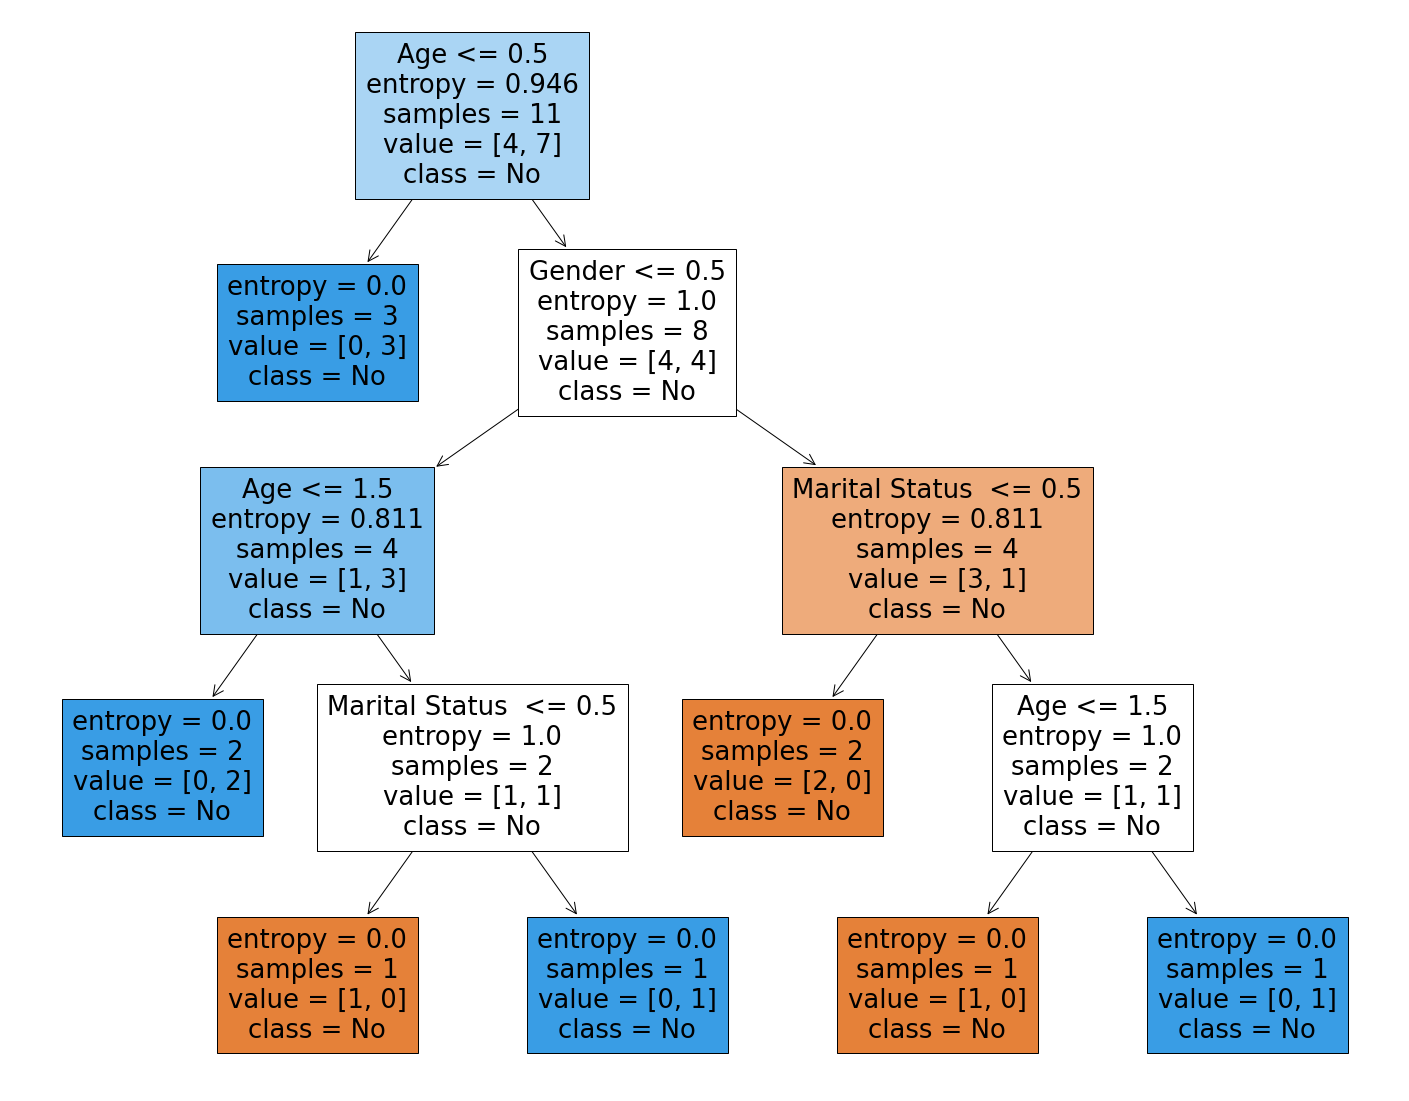

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor,feature_names = dataset.columns[1:],
                  class_names = dataset.Buys,
                  filled=True)

In [ ]:
dataset.columns

Index(['ID', 'Age', 'Income', 'Gender', 'Marital Status ', 'Buys'], dtype='object')